In [8]:
from ler.rates import LeR
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# LeR will automatically convert this to source frame and normalize it
def star_formation_rate_madau_dickinson2014(
        zs, af=2.7, bf=5.6, cf=2.9, **kwargs):
    """
    Function to compute star formation rate as given in Eqn. 15 Madau & Dickinson (2014). The output is in detector frame and is unnormalized.

    Parameters
    ----------
    zs : `float` or `numpy.ndarray` (nD array of floats)
        Source redshifts
    af : `float`
        Fitting paramters
        default: 2.7
    bf : `float`
        Fitting paramters
        default: 5.6
    cf : `float`
        Fitting paramters
        default: 2.9
        
    Returns
    ----------
    rate_density : `float` or `numpy.ndarray` (nD array of floats)
        merger rate density
    """
    # rate density
    return 0.015 * (1 + zs) ** af / (1 + ((1 + zs) / cf) ** bf)

In [11]:
## This should also work 
# from ler.gw_source_population import CBCSourceRedshiftDistribution
# cbc = CBCSourceRedshiftDistribution(
#     merger_rate_density=star_formation_rate_madau_dickinson2014,
#     merger_rate_density_param=None,
# )

In [12]:
# with custom function
ler_custom = LeR(verbose=False,
    source_priors=dict(merger_rate_density=star_formation_rate_madau_dickinson2014),
    source_priors_params=dict(merger_rate_density=None)
)

In [13]:
# ler internal function
ler_internal = LeR(verbose=False,
    source_priors=dict(merger_rate_density="star_formation_rate_madau_dickinson2014"),
    source_priors_params=dict(merger_rate_density=None)
)

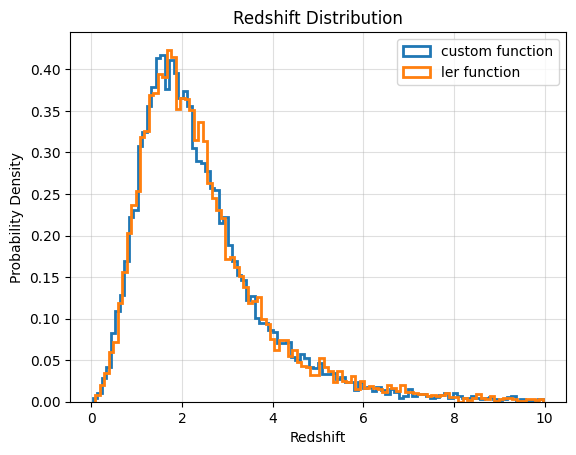

In [14]:
# plot redshift distribution
zs = ler_custom.sample_zs(10000)
zs2 = ler_internal.sample_zs(10000)
plt.hist(zs, bins=100, density=True, histtype='step', lw=2, label='custom function')
plt.hist(zs2, bins=100, density=True, histtype='step', lw=2, label='ler function')
plt.xlabel('Redshift')
plt.ylabel('Probability Density')
plt.grid(alpha=0.4)
plt.title('Redshift Distribution')
plt.legend()
plt.show()
